In [159]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [160]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [161]:
voice_data=pd.read_csv(r'C:\Users\tt172\Pictures\voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [162]:
voice_data.shape

(3168, 21)

In [163]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [39]:
voice_data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [164]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [165]:
voice_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [118]:
#basic overview of the data
from ydata_profiling import ProfileReport
profile = ProfileReport(voice_data, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
voice_data.duplicated().sum()

2

In [167]:
duplicated_values=voice_data[voice_data.duplicated()]

In [168]:
duplicated_values

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,0.248978,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,0.188957,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


In [169]:
voice_data.drop_duplicates(keep= 'first',inplace=True)

In [170]:
voice_data.shape

(3166, 21)

<AxesSubplot:xlabel='label', ylabel='Count'>

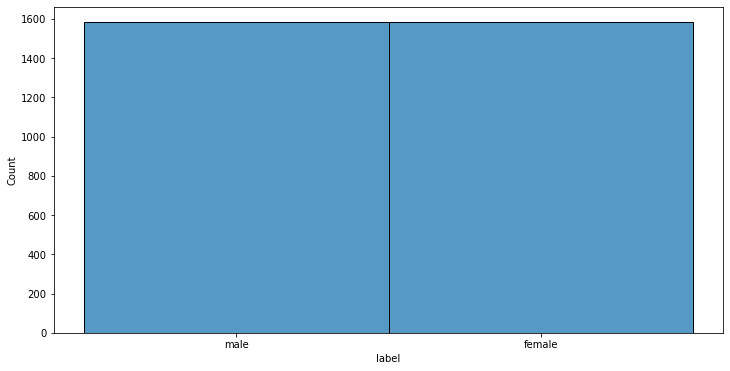

In [171]:
plt.figure(figsize=(12,6))
sns.histplot(voice_data['label'])

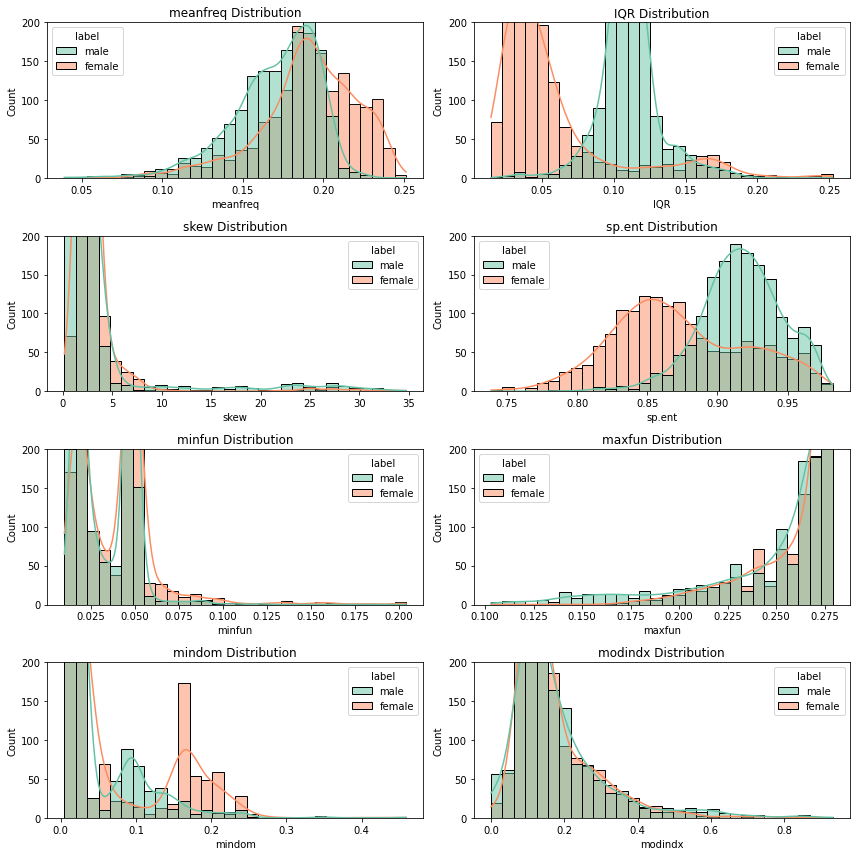

In [173]:
Xfeatures_cols = ['meanfreq','IQR','skew','sp.ent','minfun','maxfun','mindom','modindx']
plt.figure(figsize=(12,12))
for idx,column in enumerate(Xfeatures_cols):
    plt.subplot(4,2,idx+1)
    sns.histplot(x=column, hue='label', data=voice_data,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,200)
    plt.tight_layout()

In [148]:
voice_data=voice_data.sample(frac=1).reset_index(drop=True)

In [149]:
from sklearn.preprocessing import LabelEncoder
y_data_label=LabelEncoder()
voice_data['label']=y_data_label.fit_transform(voice_data['label'])

In [150]:
voice_data.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
763,0.198778,0.056755,0.210616,0.159707,0.241613,0.081906,6.230335,85.996792,0.905979,0.307965,0.090117,0.198778,0.072136,0.017897,0.150943,0.145559,0.093750,0.421875,0.328125,0.126770,1
147,0.186661,0.028007,0.183060,0.176136,0.196909,0.020773,4.394837,28.271674,0.786935,0.175778,0.180464,0.186661,0.177578,0.033755,0.266667,1.214844,0.171875,6.421875,6.250000,0.221417,0
363,0.176309,0.059555,0.190720,0.118462,0.228238,0.109777,1.495360,5.147349,0.924788,0.466217,0.225459,0.176309,0.106554,0.015984,0.228571,0.348828,0.093750,3.531250,3.437500,0.128947,1
1400,0.119567,0.088923,0.095187,0.035139,0.210834,0.175695,1.513764,5.866521,0.964303,0.747514,0.011565,0.119567,0.191964,0.016684,0.275862,0.877500,0.007812,5.414062,5.406250,0.189066,0
1429,0.195274,0.064522,0.215518,0.135240,0.254034,0.118794,1.653476,5.663781,0.915695,0.434247,0.269397,0.195274,0.125527,0.018757,0.258065,0.990885,0.046875,6.601562,6.554688,0.152292,1


In [76]:
corrmat=voice_data.corr()

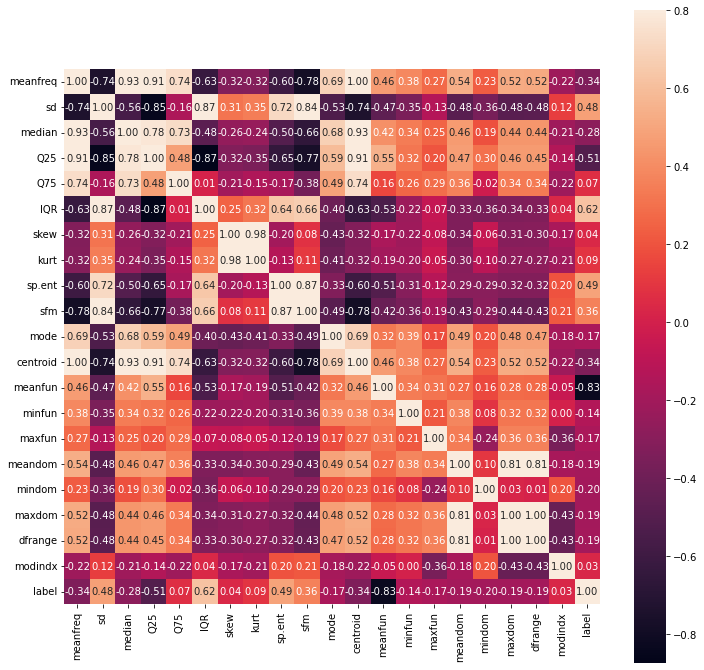

In [77]:
f, ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, 
            vmax=0.8,
            square=True,
            annot=True, 
            fmt='0.2f');

In [151]:
xfeatures_voice_data=voice_data.drop(columns=['label','sd','Q25', 'Q75','median','kurt','sfm','centroid', 'maxdom',
                                 'dfrange'])

In [152]:
xfeatures_voice_data.head()

,meanfreq,IQR,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,mindom,modindx
0,0.188879,0.104904,1.497393,0.909425,0.140386,0.133092,0.050847,0.272727,0.855938,0.023438,0.098712
1,0.187574,0.065696,1.802315,0.942977,0.231219,0.157452,0.016227,0.258065,0.491160,0.007812,0.139939
2,0.137412,0.160889,31.355068,0.833948,0.000000,0.074021,0.015779,0.275862,0.007812,0.007812,0.000000
3,0.164745,0.113131,3.490353,0.902308,0.119495,0.110657,0.027855,0.175439,0.340625,0.004883,0.352343
4,0.187497,0.058635,1.653083,0.907477,0.196000,0.154529,0.048338,0.279070,1.113502,0.023438,0.103095


In [84]:
y_voice_data=voice_data['label']
y_voice_data.sample(5)

3038    0
2250    0
1349    0
2045    0
2386    0
Name: label, dtype: int32

In [85]:
x_data=np.array(xfeatures_voice_data)
y_data=np.array(y_voice_data)

In [87]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest=train_test_split(x_data,y_data, test_size=0.2)

In [88]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((2532, 11), (634, 11), (2532,), (634,))

In [89]:
logisticreg=LogisticRegression()

In [90]:
logisticreg.fit(xtrain, ytrain)

LogisticRegression()

In [91]:
y_prediction=logisticreg.predict(xtest)

In [105]:
prediction_score=logisticreg.score(xtest, ytest)
print('Accuracy Score:',prediction_score)

Accuracy Score: 0.9211356466876972


In [103]:
print("Recall Score:",metrics.recall_score(ytest, y_prediction))

Recall Score: 0.9911242603550295


In [106]:
print("Precision Score:",metrics.precision_score(ytest, y_prediction))

Precision Score: 0.8769633507853403


In [108]:
confusion_matrix=metrics.confusion_matrix(ytest, y_prediction) 
confusion_matrix

array([[249,  47],
       [  3, 335]], dtype=int64)

In [ ]:
sns.heatmap(confuison_metrics, annot=True)

<AxesSubplot:>

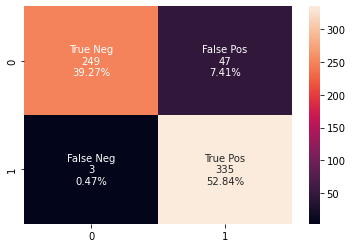

In [112]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='')